In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Cleaned_Temperature_Data.csv')

In [3]:
df.head(10)

,Date,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,4.384,2.294,Åland
2,1744-01-01,4.384,2.294,Åland
3,1744-02-01,4.384,2.294,Åland
4,1744-03-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,15.342,1.410,Åland


In [4]:
df.shape

(577462, 4)

In [5]:
#Show unique Countries
unique_countries = list(df['Country'].unique())
unique_countries.sort()
print(len(unique_countries))
print(unique_countries)

243
['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic Of The)', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte D'Ivoire", 'Denmark', 'Denmark (Europe)', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Europe', 'Falkland Islands (I

In [6]:
mean_temperature = []

for country in unique_countries:
    mean_temperature.append(df[df['Country']==country]['AverageTemperature'].mean())

In [7]:
mean_temperature

[13.997717473884146,
 24.01169770992364,
 12.583132448286495,
 23.037789783167952,
 26.548231118682633,
 11.169377894411864,
 21.81105111821089,
 26.516376811594224,
 29.235000000000316,
 26.347387790952954,
 14.61831509731719,
 7.986167380442549,
 27.8273421168204,
 7.340768354430378,
 21.633438242894034,
 6.2006742821858465,
 11.165552032520345,
 24.5065239647865,
 25.985164470473382,
 25.28499116997796,
 24.67193379257559,
 26.399693017127777,
 5.800879592466804,
 9.46369342389626,
 25.074230905077236,
 27.25419423368742,
 11.738287642345002,
 20.875982114676496,
 27.080640755379854,
 10.407888545847515,
 21.86093407761829,
 24.705560751948607,
 26.2452933684673,
 10.463632911392414,
 27.953593323216953,
 23.49488401518345,
 19.899277353689612,
 26.443093156732907,
 24.454566296883247,
 -2.9247432845970884,
 24.130627718765727,
 26.722504150283953,
 25.396560486000993,
 27.319031167459087,
 9.381674381904247,
 6.199432269197574,
 25.722210596026404,
 24.657234519104062,
 25.53369827

In [8]:
average_temps = df.groupby(['Country']).mean()

In [9]:
average_temps

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Afghanistan,13.997717,0.946040
Africa,24.011698,0.425837
Albania,12.583132,1.538406
Algeria,23.037790,1.191746
American Samoa,26.548231,0.565521
...,...,...
Western Sahara,22.236318,1.245503
Yemen,26.261244,0.870704
Zambia,21.380412,0.679616


<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

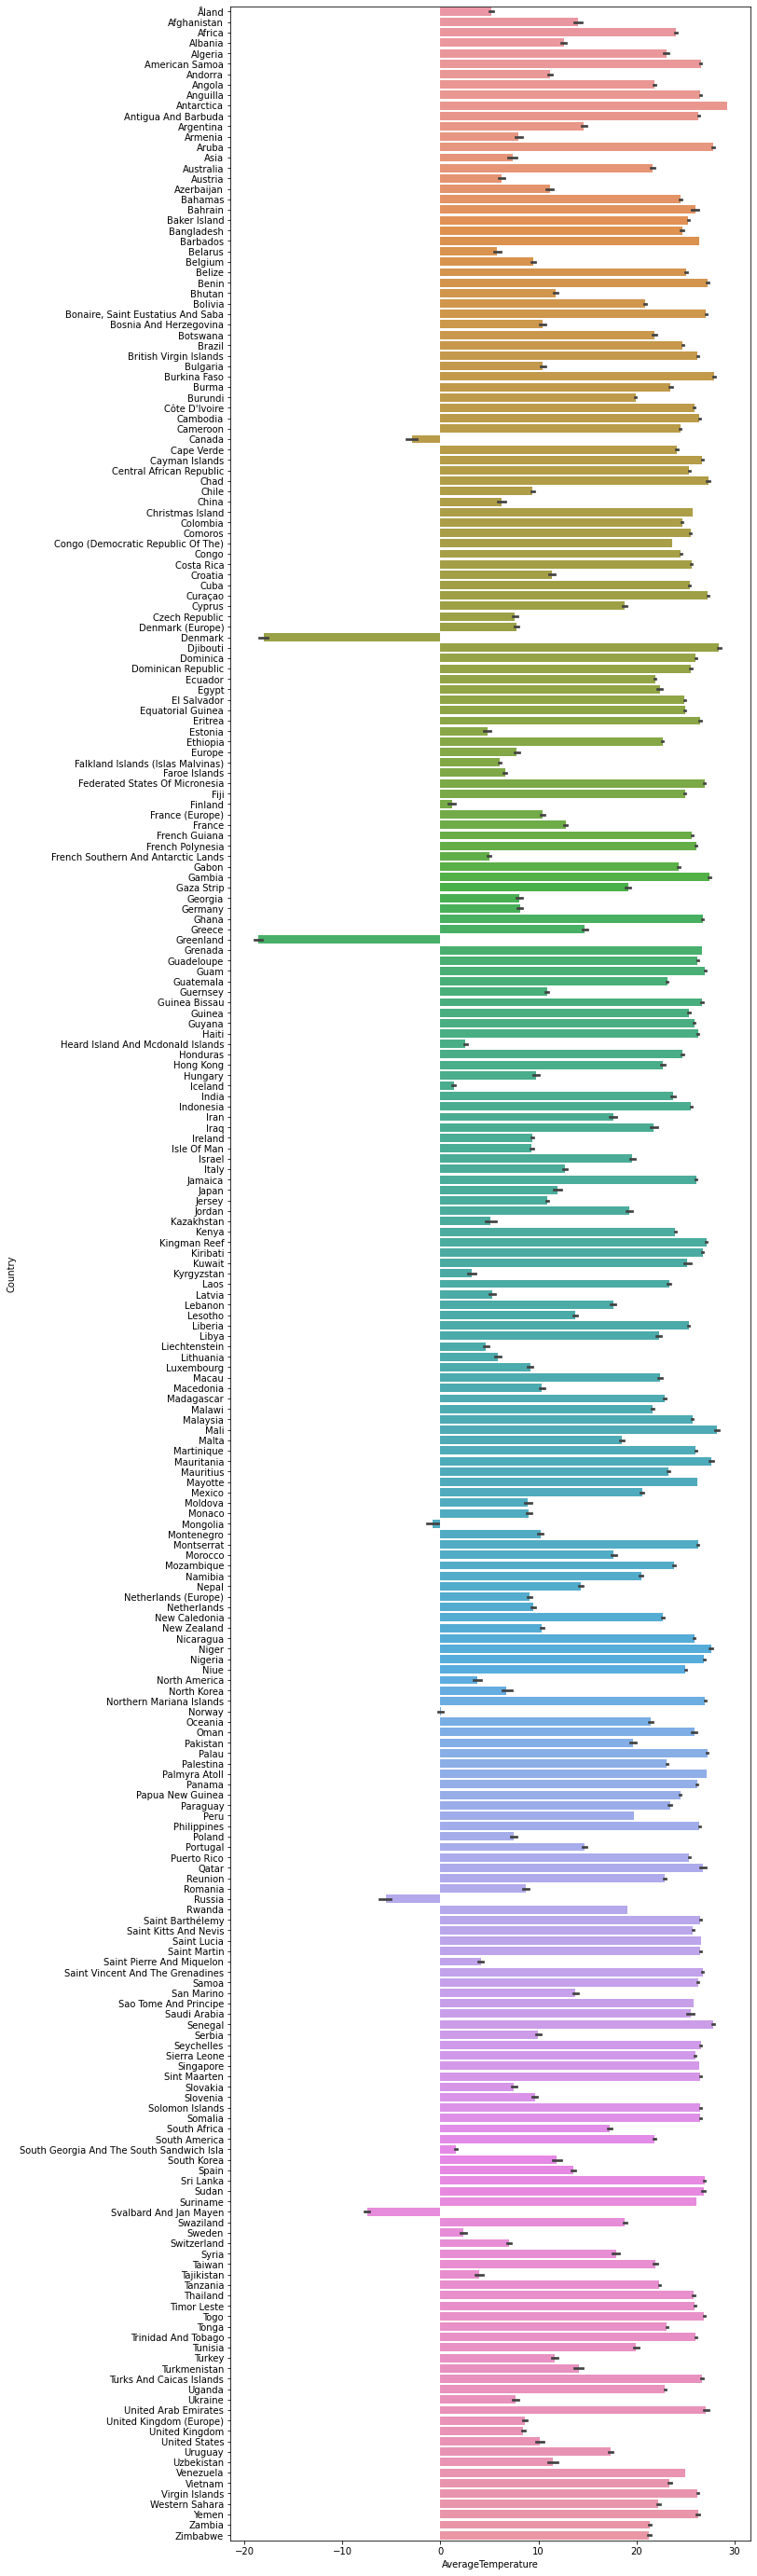

In [10]:
f, ax = plt.subplots(figsize=(10,50))

sns.barplot(x='AverageTemperature',y='Country',data=df)